<a href="https://colab.research.google.com/github/PunithKumarR/MachineLearningAssignment/blob/main/Copy_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import linear_model

In [76]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.shape

(15, 2)

In [77]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [79]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [80]:
df=df.drop_duplicates()

In [81]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

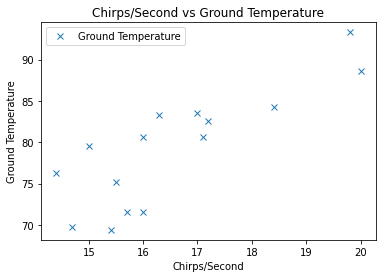

In [82]:
df.plot(x='Chirps/Second',y='Ground Temperature',style='x')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()


In [83]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [84]:
y = df[['Ground Temperature']]

In [85]:
x= df[['Chirps/Second']]

In [86]:
model=linear_model.LinearRegression()
model
model.fit(x,y)
model.predict(x)
y_pred=model.predict(x)
y_pred

array([[91.0554423],
       [77.4141503],
       [90.3733777],
       [85.5989255],
       [81.1655056],
       [75.7089888],
       [72.9807304],
       [76.3910534],
       [75.3679565],
       [78.4372472],
       [74.0038273],
       [81.5065379],
       [77.4141503],
       [80.8244733],
       [71.9576335]])

In [87]:
model.coef_

array([[3.410323]])

In [88]:
model.intercept_

array([22.84898231])

In [89]:
m=model.coef_
c=model.intercept_
y_=m*x+c
np.array(y_)

array([[91.0554423],
       [77.4141503],
       [90.3733777],
       [85.5989255],
       [81.1655056],
       [75.7089888],
       [72.9807304],
       [76.3910534],
       [75.3679565],
       [78.4372472],
       [74.0038273],
       [81.5065379],
       [77.4141503],
       [80.8244733],
       [71.9576335]])

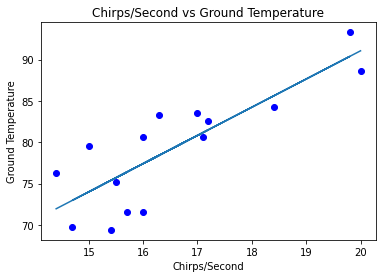

In [90]:
plt.scatter(x,y,color='blue')
plt.title('Chirps/Second vs Ground Temperature')
plt.plot(x,y_pred)
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()

In [91]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147003


In [92]:
model.predict([[95]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[346.82966726]])

In [93]:
model.predict([[18]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[84.2347963]])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [94]:
df = pd.read_fwf("brain_body.txt")
df.shape

(62, 2)

In [95]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [97]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [98]:
df=df.drop_duplicates()

In [99]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

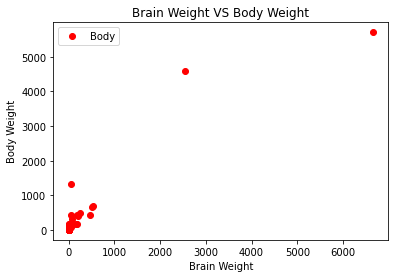

In [100]:
df.plot(x='Brain',y='Body',style='o',color='red')
plt.title('Brain Weight VS Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [101]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [102]:
percentile25=df['Brain'].quantile(0.25)
percentile75=df['Brain'].quantile(0.75)
iqr=percentile75-percentile25
print('percentile25 :',percentile25)
print('percentile75 :',percentile75)
print('iqr:',iqr)

percentile25 : 0.6000000000000001
percentile75 : 48.2025
iqr: 47.6025


In [103]:
max_limit=percentile75+1.5*iqr
min_limit=percentile25-1.5*iqr
print(max_limit)
print(min_limit)

119.60625
-70.80375000000001


In [104]:
df[(df.Brain<min_limit)|(df.Brain>max_limit)]

,Brain,Body
3,465.0,423.0
18,2547.0,4603.0
20,187.1,419.0
21,521.0,655.0
27,529.0,680.0
28,207.0,406.0
32,6654.0,5712.0
41,250.0,490.0
55,192.0,180.0
57,160.0,169.0


In [105]:
df[(df.Brain<min_limit)]

,Brain,Body


In [106]:
df[(df.Brain>max_limit)]

,Brain,Body
3,465.0,423.0
18,2547.0,4603.0
20,187.1,419.0
21,521.0,655.0
27,529.0,680.0
28,207.0,406.0
32,6654.0,5712.0
41,250.0,490.0
55,192.0,180.0
57,160.0,169.0


In [107]:
outlier_removed= df[(df.Brain>min_limit)&(df.Brain<max_limit)]
outlier_removed

,Brain,Body
0,3.385,44.50
1,0.480,15.50
2,1.350,8.10
4,36.330,119.50
5,27.660,115.00
6,14.830,98.20
7,1.040,5.50
8,4.190,58.00
9,0.425,6.40
10,0.101,4.00


In [108]:
outlier_removed.shape

(52, 2)

In [109]:
df=outlier_removed
df.shape

(52, 2)

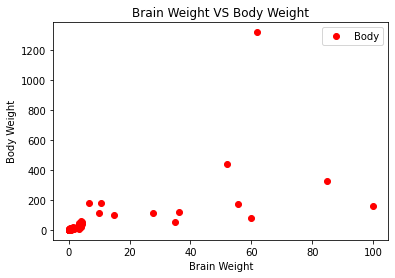

In [110]:
df.plot(x='Brain',y='Body',style='o',color='red')
plt.title('Brain Weight VS Body Weight')
plt.xlabel('Brain Weight')
plt.ylabel('Body Weight')
plt.show()

In [111]:
x=df[['Brain']]
x.shape

(52, 1)

In [112]:
y=df[['Body']]
y.shape

(52, 1)

In [113]:
model_1=linear_model.LinearRegression()
model_1.fit(x,y)
model_1.predict(x)
y_pred=model_1.predict(x)
y_pred

array([[ 31.95765844],
       [ 17.62399308],
       [ 21.91669148],
       [194.51277215],
       [151.73381219],
       [ 88.42884607],
       [ 20.38710929],
       [ 35.929638  ],
       [ 17.35261559],
       [ 15.7539555 ],
       [ 19.79501296],
       [ 20.18974385],
       [ 15.28027843],
       [ 15.55165592],
       [ 32.52508409],
       [ 25.12387995],
       [ 23.64363912],
       [ 15.36909288],
       [ 19.12890459],
       [ 64.59696872],
       [ 31.53825687],
       [ 16.24243497],
       [ 22.21273965],
       [434.65717598],
       [ 18.95620983],
       [321.17204575],
       [ 32.52508409],
       [ 48.80773321],
       [187.95037114],
       [ 35.23885894],
       [ 15.84770408],
       [ 15.36909288],
       [ 15.30494911],
       [ 22.16339829],
       [ 27.59094799],
       [289.10016112],
       [508.66921743],
       [272.62014656],
       [ 67.31074357],
       [ 17.96938261],
       [311.30377356],
       [ 33.0184977 ],
       [ 36.41318334],
       [ 16

In [114]:
model_1.coef_

array([[4.9341361]])

In [115]:
model_1.intercept_

array([15.25560775])

In [116]:
m1=model_1.coef_
c1=model_1.intercept_
y_1=m1*x+c1
np.array(y_1)

array([[ 31.95765844],
       [ 17.62399308],
       [ 21.91669148],
       [194.51277215],
       [151.73381219],
       [ 88.42884607],
       [ 20.38710929],
       [ 35.929638  ],
       [ 17.35261559],
       [ 15.7539555 ],
       [ 19.79501296],
       [ 20.18974385],
       [ 15.28027843],
       [ 15.55165592],
       [ 32.52508409],
       [ 25.12387995],
       [ 23.64363912],
       [ 15.36909288],
       [ 19.12890459],
       [ 64.59696872],
       [ 31.53825687],
       [ 16.24243497],
       [ 22.21273965],
       [434.65717598],
       [ 18.95620983],
       [321.17204575],
       [ 32.52508409],
       [ 48.80773321],
       [187.95037114],
       [ 35.23885894],
       [ 15.84770408],
       [ 15.36909288],
       [ 15.30494911],
       [ 22.16339829],
       [ 27.59094799],
       [289.10016112],
       [508.66921743],
       [272.62014656],
       [ 67.31074357],
       [ 17.96938261],
       [311.30377356],
       [ 33.0184977 ],
       [ 36.41318334],
       [ 16

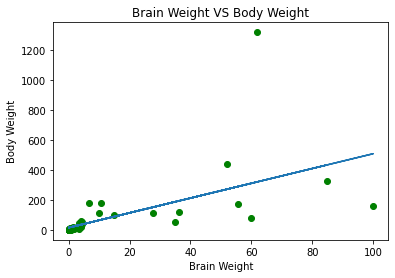

In [117]:
plt.scatter(x,y,color='green')
plt.plot(x,y_pred)
plt.title('Brain Weight VS Body Weight')
plt.xlabel("Brain Weight")
plt.ylabel('Body Weight')
plt.show()

In [118]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.3388672813039193


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [119]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.shape

(52, 6)

In [120]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [122]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [123]:
df=df.drop_duplicates()

In [124]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [125]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [126]:
cols=df.columns[:-1]
cols

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], dtype='object')

In [127]:
for i in cols:
  percentile25=df[i].quantile(0.25)
  percentile75=df[i].quantile(0.75)
  iqr=percentile75-percentile25
  max_limit=round(percentile75+1.5*iqr)
  min_limit=round(percentile25-1.5*iqr)
  print(f'iqr is :{iqr}, max value is:{max_limit}, min value is :{min_limit}')

iqr is :1.0, max value is:2, min value is :-2
iqr is :2.0, max value is:6, min value is :-2
iqr is :8.0, max value is:23, min value is :-9
iqr is :1.0, max value is:2, min value is :-2
iqr is :16.5, max value is:48, min value is :-18


In [128]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


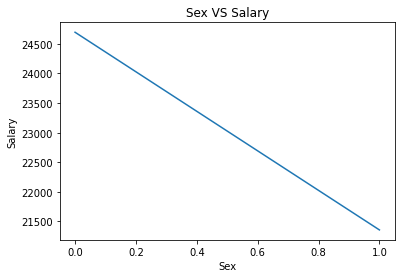

In [129]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex VS Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [130]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


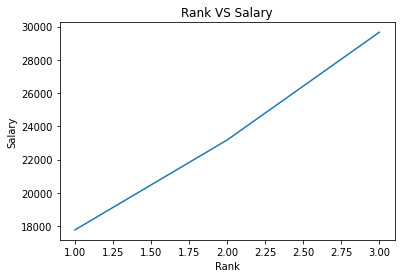

In [131]:
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank VS Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [132]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


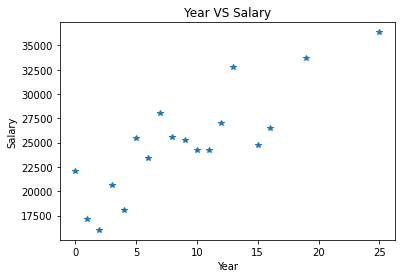

In [133]:
df.groupby('Year')['Salary'].mean().plot(style='*')
plt.title('Year VS Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [134]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


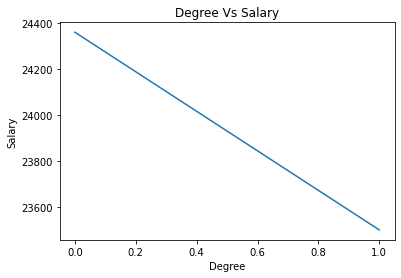

In [135]:
df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree Vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [136]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


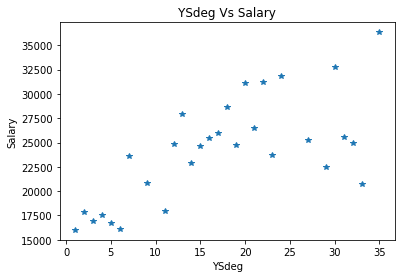

In [137]:
df.groupby('YSdeg')['Salary'].mean().plot(style='*')
plt.title('YSdeg Vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [138]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [139]:
x=df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values
y=df['Salary'].values

In [140]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [141]:
model_2=linear_model.LinearRegression()
model_2.fit(x_train,y_train)
model_2.predict(x_test)
y_pred=model_2.predict(x_test)
y_pred

array([21438.071793  , 16907.55158539, 26420.30792285, 22765.45454808,
       29412.35880034, 19807.12693583, 16467.43070944, 18364.91323613,
       24896.74648963, 32772.35719726, 30339.98496637])

In [142]:
model_2.coef_

array([1049.47723787, 5382.19291376,  440.12087596,  269.39858783,
        -47.38441412])

In [143]:
coeff_df = pd.DataFrame(model_2.coef_,['Sex', 'Rank','Year','Degree','YSdeg'],columns=['Coefficient'])
coeff_df

,Coefficient
Sex,1049.477238
Rank,5382.192914
Year,440.120876
Degree,269.398588
YSdeg,-47.384414


In [144]:
model_2.intercept_

9685.014236465679

In [145]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,26182,21438.071793
1,17095,16907.551585
2,24750,26420.307923
3,22450,22765.454548
4,28200,29412.358800
5,21600,19807.126936
6,18075,16467.430709
7,23713,18364.913236
8,24800,24896.746490
9,33696,32772.357197


In [146]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6623158614875557
